In [1]:
import sys
sys.path.append('../../src/')

from density_map import get_density_map

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../data/data_refined.csv')

timestamps_unique = df['timestamp'].unique()

batch = df[df['timestamp'] == timestamps_unique[1]]
print(len(batch))
batch.head()

1002


,timestamp,mac,x,y,error,rssi,floor_id,room_id
428,1723194745,b5650501c32ad2495dee82fecc444be6ca3b367c9b678b...,53.116238,53.073000,0.043238,-70.000000,1106,NaN
429,1723194745,f35e7141a881430ce0860645851c18bfbdb1d7bc4d0464...,3.139814,21.530941,10.000000,-49.949997,1099,69630.0
430,1723194745,cf12397cb3f80dfc8980d63a63ba038bd78cc328040617...,46.783629,46.486738,0.336266,-42.000000,1110,70846.0
431,1723194745,c2e2aa6a38c356d75e20ed85dc9b7b510873ac2c2e882b...,29.314949,44.720580,10.000000,-63.550000,1036,66323.0
432,1723194745,c097a0c2f91683864ce3f1ad268aa1b694083ef802a53e...,1.794312,25.142163,10.000000,-54.000000,1654,NaN


In [3]:
density_map = get_density_map(1654, batch)

In [4]:
print(density_map.astype(np.uint8))

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [198 216 247]
  [198 216 247]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [198 216 247]
  [199 216 247]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

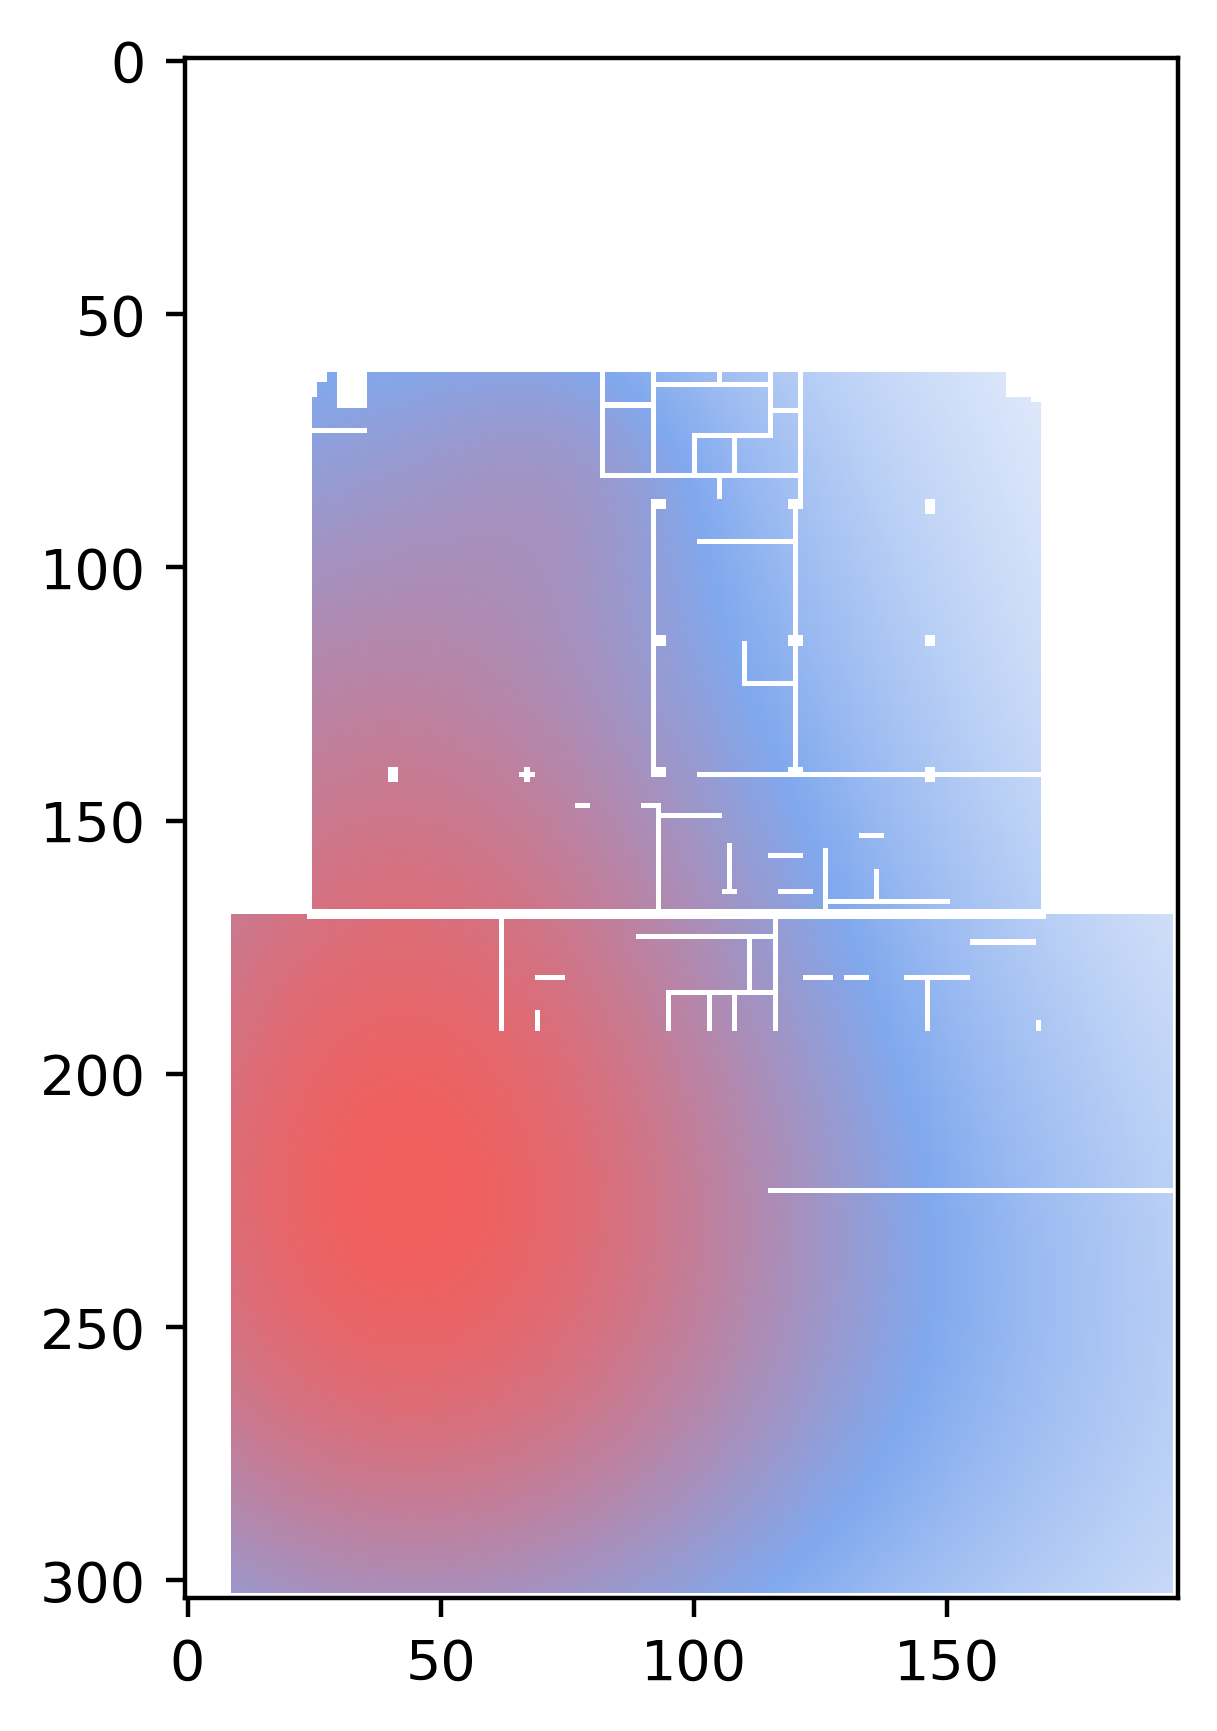

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(density_map.shape[1])
y = np.arange(density_map.shape[0])
xs, ys = np.meshgrid(x, y)


ax.imshow(density_map / 255)
#ax.contourf(xs, ys, density_map, cmap='BuGn', levels= 10)

#ax.imshow(density_map, cmap='hot', interpolation='nearest')